# Objective
## 1. Getting familiar to work with keras library and building ANNs.
## 2. Focus is on building a model for regression problem.
### (Note: Not focusing much on building the perfect model)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

### Independent columns: 
#### 'Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research'

### Dependent column: 
#### 'Chance of Admit '

In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## All the columns are of the correct datatypes.

In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Modifying data

In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Drop the Serial No. column as it is not useful in the analysis.

In [10]:
df.drop('Serial No.', axis=1, inplace=True)

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Scaling the data in order to ensure that all the features contribute equally in the building of the model. It is also done to help in convergence of the weights.

## MinMax scaling will be applied on the data as we are aware of the upper bound and lower bound of the data.

## Splitting of the data into train and test before scaling.

In [12]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split as tts

In [14]:
X_train, X_test, y_train, y_test= tts(X, y, test_size=0.2, random_state=0)

In [15]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
107,338,117,4,3.5,4.5,9.46,1
336,319,110,3,3.0,2.5,8.79,0
71,336,112,5,5.0,5.0,9.76,1
474,308,105,4,3.0,2.5,7.95,1
6,321,109,3,3.0,4.0,8.20,1
...,...,...,...,...,...,...,...
323,305,102,2,2.0,2.5,8.18,0
192,322,114,5,4.5,4.0,8.94,1
117,290,104,4,2.0,2.5,7.46,0
47,339,119,5,4.5,4.0,9.70,0


In [16]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()

In [17]:
X_train= mms.fit_transform(X_train)
X_test= mms.transform(X_test)

In [18]:
X_train

array([[0.96      , 0.89285714, 0.75      , ..., 0.875     , 0.8525641 ,
        1.        ],
       [0.58      , 0.64285714, 0.5       , ..., 0.375     , 0.63782051,
        0.        ],
       [0.92      , 0.71428571, 1.        , ..., 1.        , 0.94871795,
        1.        ],
       ...,
       [0.        , 0.42857143, 0.75      , ..., 0.375     , 0.21153846,
        0.        ],
       [0.98      , 0.96428571, 1.        , ..., 0.75      , 0.92948718,
        0.        ],
       [0.64      , 0.64285714, 0.75      , ..., 1.        , 0.74679487,
        1.        ]])

In [19]:
print(X_train.shape)
print(X_test.shape)

(400, 7)
(100, 7)


## We do not use fit_transform in X_test as we do not want the program to be know the values of the test set.

# Architecture of the ANNs

## 7 input features two dense layers having 10 nodes each and one output layer having 1 node.

# Building Artificial Neural Network

In [20]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [21]:
#blank canvas
model= Sequential()

#first hidden layer
model.add(Dense(10, activation='relu', input_dim= 7)) 
#input_dim= 7 is the information about input layer

#second hidden layer
model.add(Dense(10, activation='relu'))
          
#output layer
model.add(Dense(1, activation= 'linear'))
#for regression problems the activation function of the node will be a linear function

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
#backward propogation
model.compile(loss= 'mean_squared_error', optimizer= 'Adam', metrics=['r2_score'])

## The error between the y predicted and the ground truth will be calculated by the loss.
## In order to reduce the loss optimizer will find the values of weights and biases.
## Metrics will evaluate the performance of the model on unseen data.

In [24]:
values= model.fit(X_train, y_train, epochs= 100, validation_data= (X_test, y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.7080 - r2_score: -81.3425 - val_loss: 1.1514 - val_r2_score: -64.9253
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0840 - r2_score: -47.9481 - val_loss: 0.7316 - val_r2_score: -40.8896
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6580 - r2_score: -31.4170 - val_loss: 0.4391 - val_r2_score: -24.1419
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3781 - r2_score: -16.6598 - val_loss: 0.2605 - val_r2_score: -13.9184
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2298 - r2_score: -10.3037 - val_loss: 0.1743 - val_r2_score: -8.9815
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1408 - r2_score: -5.9195 - val_loss: 0.1408 - val_r2_score: -7.0632
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1218 - r2_score: -5.0514 - val_loss: 0.1211 - val_r2_score: -5.9324
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1183 - r2_score: -5.1169 -

## Epoch refers to one complete pass through the entire training dataset, where the model performs both forward and backward propagation for every data point once. So, if we have "100 epochs," it means the model will go through the entire dataset 100 times, performing 100 forward passes and 100 backward passes in total.

## 1 epoch includes 1 forward and 1 backward pass of all the training data.

## Validation_data At the end of each epoch the model will predict the values for test set to evaluate the performance on unseen data.

# loss: 0.0038 - r2_score: 0.7868 - val_loss: 0.0042 - val_r2_score: 0.7586

## loss: value of the loss function which if close to zero means the model is predicting values closer to the ground truth.

## r2_score: (Coefficient of Determination) measures how well the model explains the variance in the target variable. 78% of the variance in the values of Chance of admit  column is explained by the indenpendent columns. The remaining 22% of the variation in the values of Chance of Admit is due to factors not included in the model (e.g., other variables like interview performance, extracurriculars or random factors/noise). It's good if R2 score is closer to 1.

## val_loss: loss for the given test data.

## val_r2_score: r_2 score calculated for the given test data.

# Visualization of the loss function values on train and test data.

In [25]:
import matplotlib.pyplot as plt

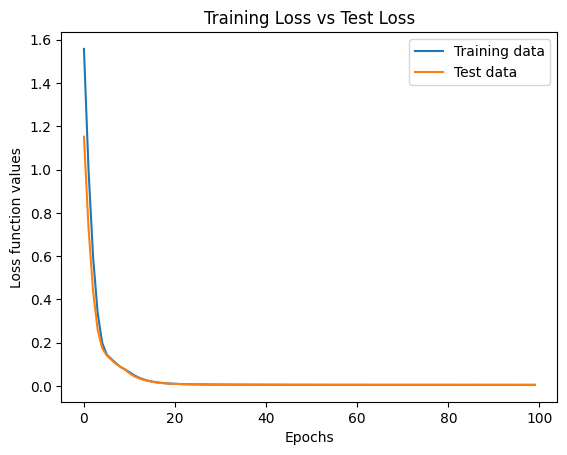

In [26]:
plt.plot(values.history['loss'], label= 'Training data')
plt.plot(values.history['val_loss'], label= 'Test data')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss function values')
plt.title('Training Loss vs Test Loss')
plt.show()

## The convergence of training and validation loss at the end of training indicates that the model is well-fitted, with minimal overfitting or underfitting, and demonstrates good generalization to unseen data